# How to use the datasets provided by the gan_t2i module

Import from the module `gan_t2i.datasets.DatasetFactory` the `DataFactory`

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader

module_path = os.path.join(os.getcwd(), '../src')
sys.path.append(module_path)

# Use the DatasetFactory to load the dataset
import gan_t2i.datasets.DatasetFactory as DatasetFactory

## Flowers Dataset

Create the dataset (e.g. the flower dataset)

In [2]:
# Create a data folder where to store the dataset
data_folder = os.path.join(os.getcwd(), '../data')

# Create the dataset
flower_dataset = DatasetFactory.Flowers(data_folder, resize=(64, 64))

Captions already downloaded
images already downloaded
Captions already extracted
images already extracted
Reading dataset ...


100%|██████████| 204/204 [01:58<00:00,  1.73it/s]

	=> Dataset loaded


All the images in the laoded dataset have the resize dimension (in this case 64 x 64 x 3 color channels)

In [3]:
for idx, (img, cap) in enumerate(flower_dataset):
    assert img.shape == (64, 64, 3)  # check the shape of the images
print("All images have the right shape!")

All images have the right shape!


Let's see the dataset length

In [4]:
print("dataset length: ", len(flower_dataset))

dataset length:  81890


Let's see some images of the dataset with the corresponding caption

image 1 caption: this flower has white pistil with small purple petals as its main features
image 2 caption: a round petaled flower with black speckles and curly stamen.
image 3 caption: this flower is blue and green in color, with petals that are curled upward.
image 4 caption: the flower has many narrow oval yellow petals and yellow stamen.


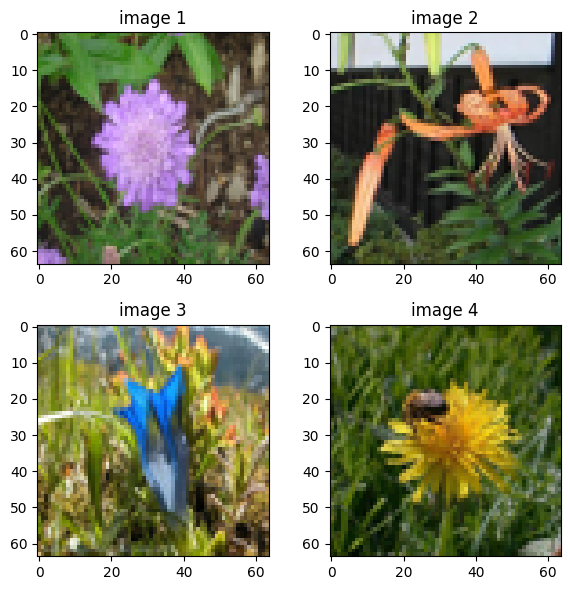

In [5]:
random_indexes = [random.randint(0, len(flower_dataset) - 1) for _ in range(4)]

plt.figure(figsize=(6,6))
for i, d_index in enumerate(random_indexes):
    plt.subplot(2,2,i+1)
    plt.imshow(flower_dataset[d_index][0])
    plt.title(f"image {i+1}")    
    print(f"image {i+1} caption: {flower_dataset[d_index][1]}")
plt.tight_layout()
plt.show()

## Birds Dataset

Let's now test the birds dataset

In [6]:
# Create a data folder where to store the dataset
data_folder = os.path.join(os.getcwd(), '../data')

# Create the dataset
birds_dataset = DatasetFactory.Birds(data_folder, resize=(64, 64))

Captions already downloaded
Images already downloaded
Reading dataset ...


100%|██████████| 400/400 [01:10<00:00,  5.68it/s]

	=> Dataset loaded


In [7]:
for idx, (img, cap) in enumerate(birds_dataset):
    assert img.shape == (64, 64, 3)  # check the shape of the images
print("All images have the right shape!")

All images have the right shape!


In [8]:
print("dataset length: ", len(birds_dataset))

dataset length:  117800


image 1 caption: this bird is large, with orange eyes and a long bill
image 2 caption: this is a brown bird with a brown and white wingbar,and a black and white crown
image 3 caption: this is a black bird with a thick orange beak that has a white piece at the base of it.
image 4 caption: this bird is yellow and grey in color with a sharp black beak and yellow eye ring.


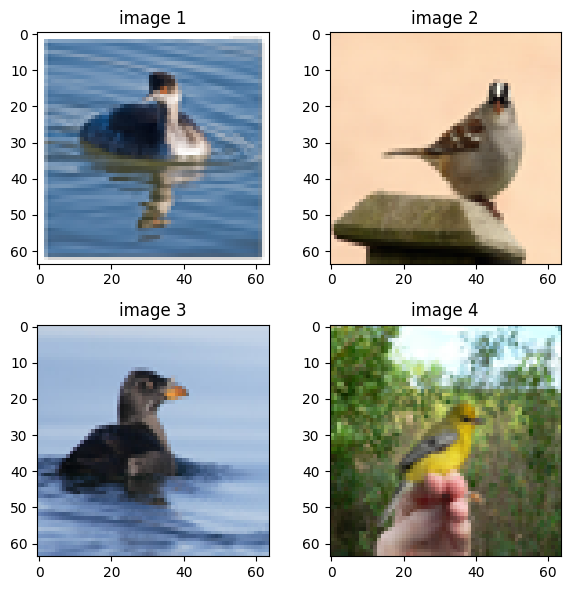

In [9]:
random_indexes = [random.randint(0, len(birds_dataset) - 1) for _ in range(4)]

plt.figure(figsize=(6,6))
for i, d_index in enumerate(random_indexes):
    plt.subplot(2,2,i+1)
    plt.imshow(birds_dataset[d_index][0])
    plt.title(f"image {i+1}")    
    print(f"image {i+1} caption: {birds_dataset[d_index][1]}")
plt.tight_layout()
plt.show()

## Using Torch DataLoader with the datasets

You can use the provided `DataLoader` of pytorch to load, shuffle, divide into batches, etc... the datasets.

In [10]:
flowers_dataloader = DataLoader(flower_dataset, batch_size=32, shuffle=True, num_workers=4)

batch_numbers = 0
for images, captions in flowers_dataloader:
    batch_numbers += 1
print("Number of batches: ", batch_numbers)

Number of batches:  2560


In [11]:
birds_dataloader = DataLoader(birds_dataset, batch_size=32, shuffle=True, num_workers=4)

batch_numbers = 0
for images, captions in birds_dataloader:
    batch_numbers += 1
print("Number of batches: ", batch_numbers)

Number of batches:  3682
